***Week - 1***

Mean Squared Error: 0.9722862908777644
R-squared: 0.9655417745884483


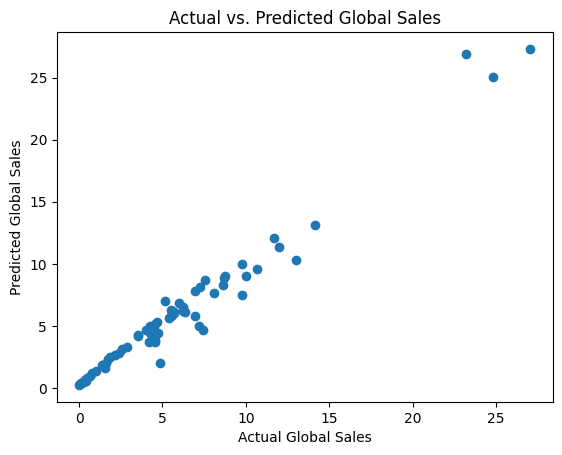

In [3]:
# Week 1 - Linear Regression for Loyalty Points Prediction

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset

df = pd.read_csv('turtle_sales.csv')

# Step 2: Prepare the data for regression
X = df[['NA_Sales', 'EU_Sales']]
y = df['Global_Sales']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and fit the linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Step 5: Make predictions using the model
y_pred = reg_model.predict(X_test)

# Step 6: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 7: Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 8: (Optional) You can also visualize the predicted vs. actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs. Predicted Global Sales')
plt.show()


**Week - 2**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Top words per cluster:
Cluster 1:
great
good
book
old
cute
year
loves
little
gift
fun


Cluster 2:
love
game
kids
clients
great
play
year
fun
old
size


Cluster 3:
game
great
fun
play
expansion
board
family
games
played
like




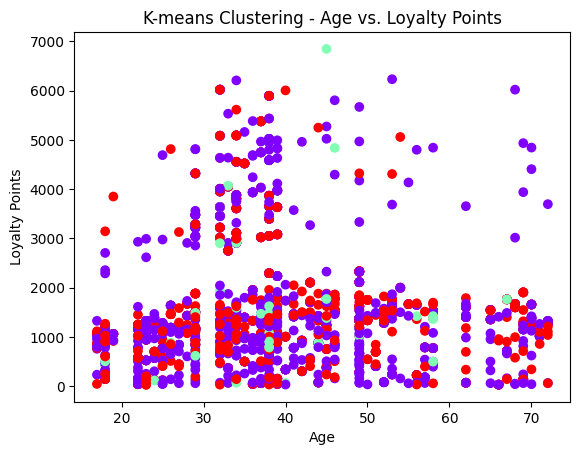

In [5]:
# Week 2 - K-means Clustering

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Import the datset

df_reviews = pd.read_csv('turtle_reviews.csv')


# Step 2: Preprocess the text data for clustering
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_reviews['review'])

# Step 3: Perform k-means clustering
num_clusters = 3  # You can change this number based on the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_reviews['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Step 4: Print the cluster centers (representative words in each cluster)
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
print("Top words per cluster:")
for i in range(num_clusters):
    print(f"Cluster {i + 1}:")
    for j in order_centroids[i, :10]:
        print(f"{terms[j]}")
    print("\n")

# Step 5: Visualize the clusters (age vs. loyalty_points)
plt.scatter(df_reviews['age'], df_reviews['loyalty_points'], c=df_reviews['cluster'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('K-means Clustering - Age vs. Loyalty Points')
plt.show()

**Week - 3**

In [8]:
# Week 3 - Natural Language Processing (NLP) for Customer Sentiments

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Step 1: Import the dataset
df_reviews = pd.read_csv('turtle_reviews.csv')

# Step 2: Tokenize the reviews and count word occurrences
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
word_counts = vectorizer.fit_transform(df_reviews['review'])
word_list = vectorizer.get_feature_names_out()

# Step 3: Count the occurrences of each word
word_freq = word_counts.toarray().sum(axis=0)
word_freq_dict = dict(zip(word_list, word_freq))

# Step 4: Get the 15 most common words in the reviews
most_common_words = Counter(word_freq_dict).most_common(15)
print("Top 15 Most Common Words in Reviews:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Step 5: Get the top 20 positive and negative reviews
positive_reviews = df_reviews[df_reviews['summary'] == 'Five Stars']['review'].head(20).tolist()
negative_reviews = df_reviews[df_reviews['summary'] == 'Another worthless Dungeon Master\'s screen...']['review'].head(20).tolist()

print("\nTop 20 Positive Reviews:")
for i, review in enumerate(positive_reviews):
    print(f"{i + 1}. {review}")

print("\nTop 20 Negative Reviews:")
for i, review in enumerate(negative_reviews):
    print(f"{i + 1}. {review}")

Top 15 Most Common Words in Reviews:
game: 1713
great: 598
fun: 558
play: 509
like: 421
just: 375
love: 332
really: 319
cards: 306
tiles: 300
time: 298
good: 296
book: 278
old: 271
new: 264

Top 20 Positive Reviews:
1. Amazing buy! Bought it as a gift for our new dm and it's perfect!
2. Grandson loves
3. Came in perfect condition.
4. Works very well
5. Very fun game for my family
6. Beautiful art work
7. I love it!
8. Absolutely great pictures even before coloring!
9. Great purchase and got it in good time.
10. MY HUSBAND LOVED IT. HE IS IN TO DRAGONS.
11. The dragons are really interesting and fun to color.
12. love it
13. Great!
14. AGE APPROPIATE. G'SON LOVED
15. Great for kindergarten birthday goody bag.
16. Good product
17. Great fun for my grandson who loves robots.
18. great book
19. Small book but great stickers
20. Grandson loved it

Top 20 Negative Reviews:


**Week - 4**

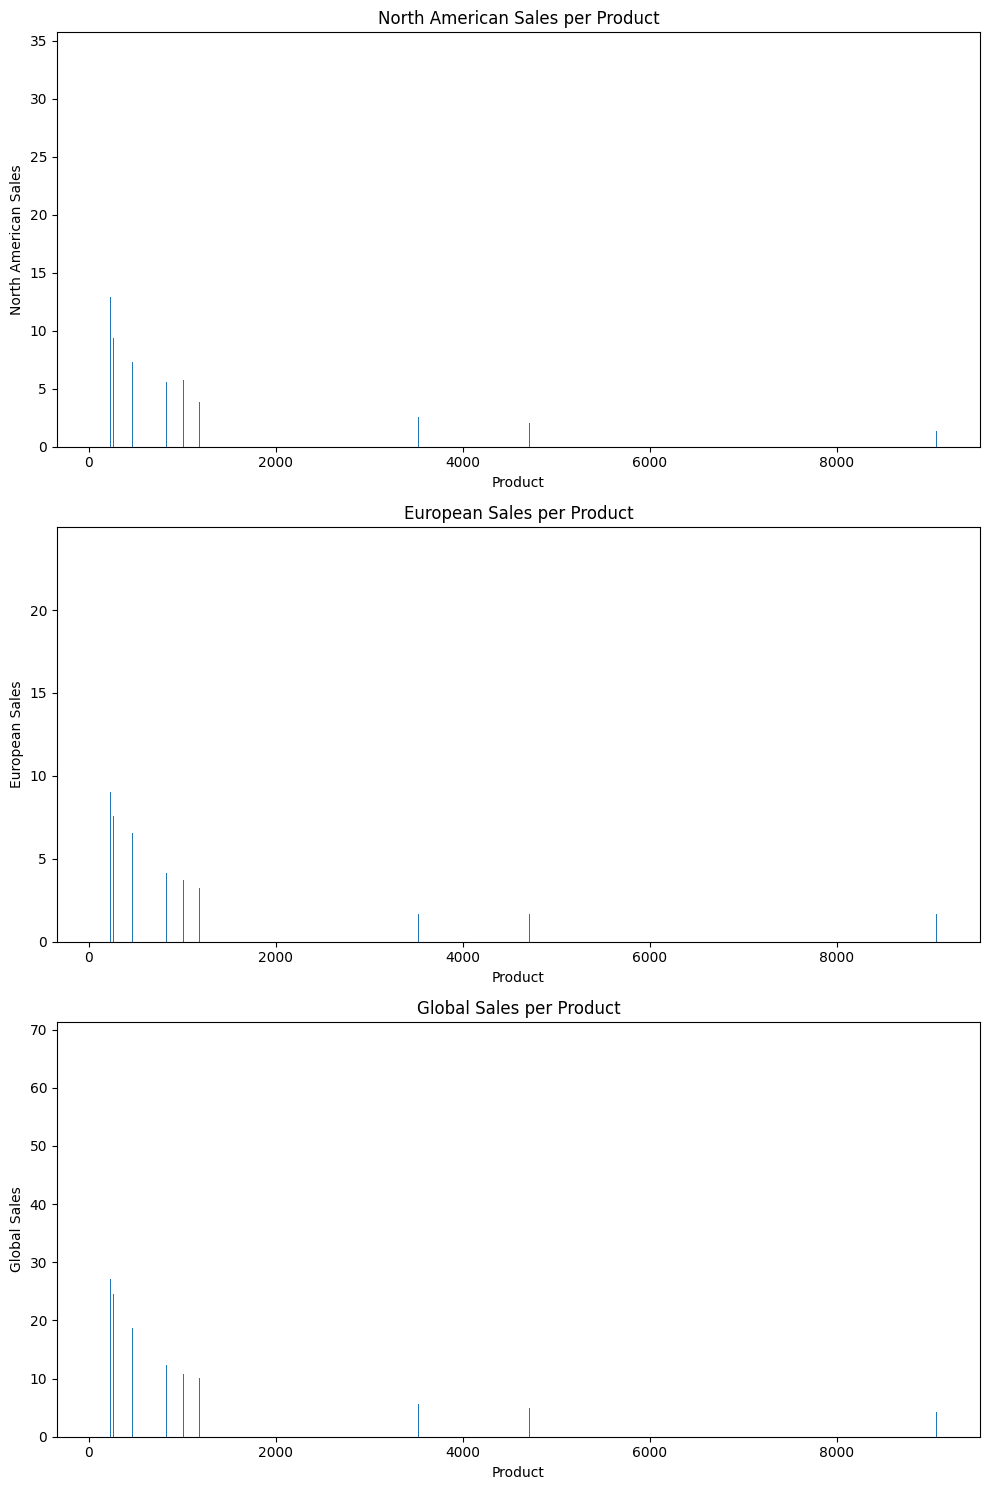

In [12]:
# Week 4 - Visualize Data to Gather Insights

import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Load the dataset

df_sales = pd.read_csv('turtle_sales.csv')


# Step 2: Visualize the impact of sales per product using bar plots
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Bar plot for North American Sales
ax[0].bar(df_sales['Product'], df_sales['NA_Sales'])
ax[0].set_xlabel('Product')
ax[0].set_ylabel('North American Sales')
ax[0].set_title('North American Sales per Product')

# Bar plot for European Sales
ax[1].bar(df_sales['Product'], df_sales['EU_Sales'])
ax[1].set_xlabel('Product')
ax[1].set_ylabel('European Sales')
ax[1].set_title('European Sales per Product')

# Bar plot for Global Sales
ax[2].bar(df_sales['Product'], df_sales['Global_Sales'])
ax[2].set_xlabel('Product')
ax[2].set_ylabel('Global Sales')
ax[2].set_title('Global Sales per Product')

plt.tight_layout()
plt.show()

**Week - 5**

Sales Data Distribution:
Column: NA_Sales
Skewness: 4.327673564472524
Kurtosis: 28.792887157187945


Column: EU_Sales
Skewness: 4.839334182763234
Kurtosis: 42.304776080403556


Column: Global_Sales
Skewness: 4.062916272558798
Kurtosis: 30.082268325088314




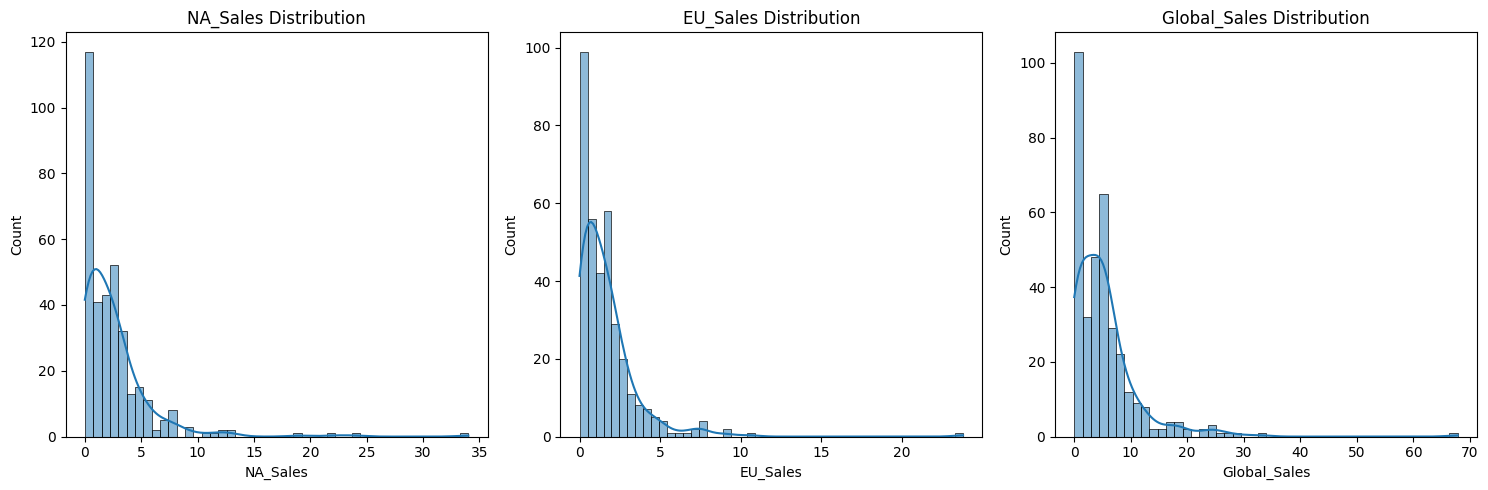

In [13]:
# Week 5 - Clean, Manipulate, and Visualize Data for Reliability Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset

df_sales = pd.read_csv('turtle_sales.csv')


# Step 2: Check for normal distribution, skewness, and kurtosis in the sales data
sales_columns = ['NA_Sales', 'EU_Sales', 'Global_Sales']

print("Sales Data Distribution:")
for col in sales_columns:
    print(f"Column: {col}")
    print(f"Skewness: {df_sales[col].skew()}")
    print(f"Kurtosis: {df_sales[col].kurtosis()}")
    print("\n")

# Step 3: Visualize the distribution of sales data
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(sales_columns):
    sns.histplot(df_sales[col], kde=True, ax=ax[i])
    ax[i].set_title(f'{col} Distribution')
plt.tight_layout()
plt.show()

**Week - 6**

Mean Squared Error: 0.9722862908777644
R-squared: 0.9655417745884483


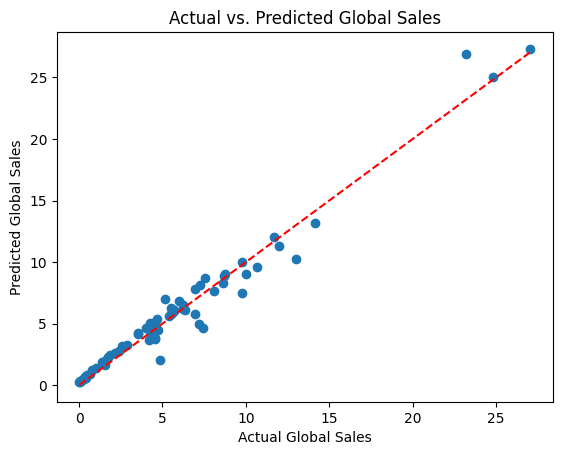

In [14]:
# Week 6 - Regression Analysis for Sales Relationship

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Load the dataset

df_sales = pd.read_csv('turtle_sales.csv')



# Step 2: Prepare the data for regression analysis
X = df_sales[['NA_Sales', 'EU_Sales']]
y = df_sales['Global_Sales']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict the global sales using the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Step 7: Visualize the predicted vs. actual global sales
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs. Predicted Global Sales')
plt.show()